In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('LyricsCV.csv')
df_t = pd.DataFrame(TfidfTransformer().fit_transform(df).toarray(), columns=df.columns)
label = pd.read_csv('lyrics_processed.csv')['hit']
df_t

,afraid,aliv,allah,alon,alreadi,alright,alway,angel,anoth,answer,...,wonder,word,work,world,worri,write,wrong,yeah,year,young
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.204201,0.000000,0.076755,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.049044,0.000000,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.098855,0.0,0.0,0.0,0.0,0.000000,0.062753,0.000000,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.416135,0.0,0.0,0.0,0.0,0.000000,0.000000,0.112594,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.070135,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20319,0.0,0.0,0.0,0.11921,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.062285,0.000000,0.000000,0.0
20320,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.054335,0.0,...,0.0,0.054692,0.0,0.0,0.0,0.0,0.000000,0.867968,0.000000,0.0
20321,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.088289,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.128644,0.000000,0.0
20322,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.032117,0.000000,0.0


In [13]:
df_sample = df_t.copy()
df_sample['hit'] = label
df_sample = df_sample.sample(1000)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_t, label, test_size=0.2, random_state=42)
print('Training set dim:', X_train.shape)
print('Testing set dim:', X_test.shape)

Training set dim: (16259, 403)
Testing set dim: (4065, 403)


In [5]:
def performance(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    print('Sensitivity : ', TP/(TP+FN))
    print('Specificity : ', TN/(TN+FP))
    print('Precision : ', TP/(TP+FP))
    print('Negative predictive value : ', TN/(TN+FN))
    print('False positive rate : ', FP/(FP+TN))
    print('False negative rate : ', FN/(TP+FN))
    print('False discovery rate : ', FP/(TP+FP))
    print('Accuracy : ', (TP+TN)/(TP+FP+FN+TN) )

# Poly

In [14]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(kernel='poly'), param_grid)
grid.fit(df_sample.drop(columns=['hit']),df_sample['hit'])
print(grid.best_estimator_)

SVC(C=1, gamma=1, kernel='poly')


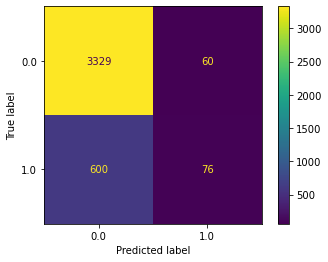

In [15]:
poly = SVC(kernel='poly', C=1, gamma=1)
poly.fit(X_train, y_train)

pred_poly = poly.predict(X_test)

plot_confusion_matrix(poly, X_test, y_test)

In [16]:
performance(confusion_matrix(y_test, pred_poly))

Sensitivity :  0.11242603550295859
Specificity :  0.9822956624372972
Precision :  0.5588235294117647
Negative predictive value :  0.8472893866123695
False positive rate :  0.01770433756270286
False negative rate :  0.8875739644970414
False discovery rate :  0.4411764705882353
Accuracy :  0.8376383763837638


# RBF

In [17]:
grid = GridSearchCV(SVC(kernel='rbf'), param_grid)
grid.fit(df_sample.drop(columns=['hit']),df_sample['hit'])
print(grid.best_estimator_)

SVC(C=1, gamma=1)


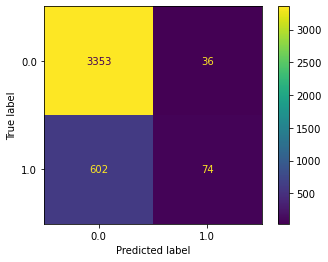

In [18]:
rbf = SVC(kernel='rbf', C=1, gamma=1)
rbf.fit(X_train, y_train)

pred_rbf = rbf.predict(X_test)

plot_confusion_matrix(rbf, X_test, y_test)

In [19]:
performance(confusion_matrix(y_test, pred_rbf))

Sensitivity :  0.10946745562130178
Specificity :  0.9893773974623783
Precision :  0.6727272727272727
Negative predictive value :  0.8477876106194691
False positive rate :  0.010622602537621718
False negative rate :  0.8905325443786982
False discovery rate :  0.32727272727272727
Accuracy :  0.8430504305043051


# Sigmoid

In [20]:
grid = GridSearchCV(SVC(kernel='sigmoid'), param_grid)
grid.fit(df_sample.drop(columns=['hit']),df_sample['hit'])
print(grid.best_estimator_)

SVC(C=10, gamma=0.1, kernel='sigmoid')


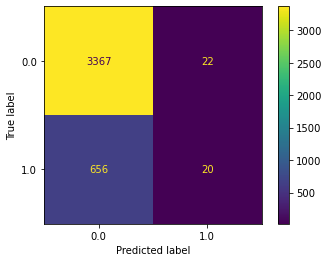

In [21]:
sig = SVC(kernel='sigmoid', C=10, gamma=0.1)
sig.fit(X_train, y_train)

pred_sig = sig.predict(X_test)

plot_confusion_matrix(sig, X_test, y_test)

In [22]:
performance(confusion_matrix(y_test, pred_sig))

Sensitivity :  0.029585798816568046
Specificity :  0.9935084095603423
Precision :  0.47619047619047616
Negative predictive value :  0.8369376087496893
False positive rate :  0.006491590439657716
False negative rate :  0.9704142011834319
False discovery rate :  0.5238095238095238
Accuracy :  0.8332103321033211


# Linear

In [23]:
grid = GridSearchCV(SVC(kernel='linear'), param_grid)
grid.fit(df_sample.drop(columns=['hit']),df_sample['hit'])
print(grid.best_estimator_)

SVC(C=1, gamma=1, kernel='linear')


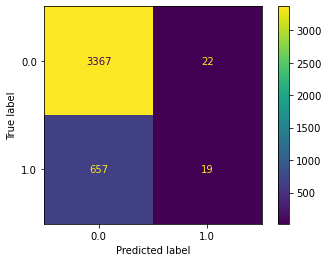

In [32]:
linear = SVC(kernel='linear', C=1, gamma=1)
linear.fit(X_train, y_train)

pred_linear = linear.predict(X_test)

plot_confusion_matrix(linear, X_test, y_test)

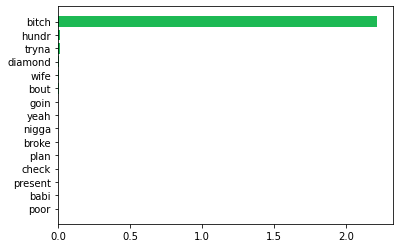

In [33]:
imp = linear.coef_[0]
imp, names = zip(*sorted(list(zip(imp, df.columns)),reverse=True))


plt.barh(range(15), imp[0:15][::-1], align='center', color='#1DB954')
plt.yticks(range(15), names[0:15][::-1])
plt.show()

/var/folders/lv/snv97l992c5ctbbxj96wt76w0000gn/T/ipykernel_11746/1519123685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['hit'] = label


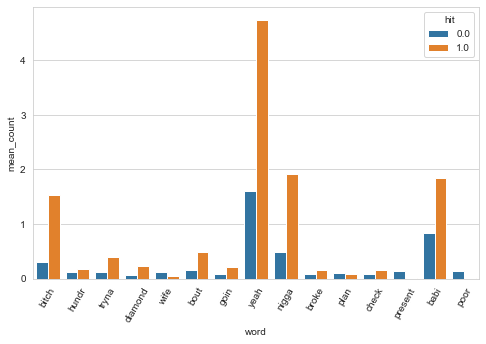

In [35]:
sns.set_style("whitegrid")
top = df[list(names[0:15][::])]
top['hit'] = label
df_melted = pd.melt(top.groupby('hit').mean().T.reset_index(), id_vars=['index'], value_vars=[0.0,1.0])
df_melted.columns = ['word','hit','mean_count']
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(data=df_melted, x='word', y='mean_count', hue='hit')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()